#**Rejection Sampling**

El muestreo de rechazo es uno de los algoritmos de muestreo más simples. Este método se utiliza para extraer muestras de una distribución objetivo $P(x)$ complicada donde el muestreo directo es difícil. Esto se puede hacer proponiendo una distribución $Q(x)$ que sea fácil de muestrear. Este $Q(x)$ tiene que tener una propiedad importante, a saber, $Q(x)$ tiene que envolver la distribución objetivo $P(x)$. Eso significa que, dado un factor de escala $k$, tiene que ser $kQ(x) > P(x)$, para todo $x$. En otras palabras, nuestra distribución objetivo tiene que estar completamente bajo nuestra distribución propuesta escalada.

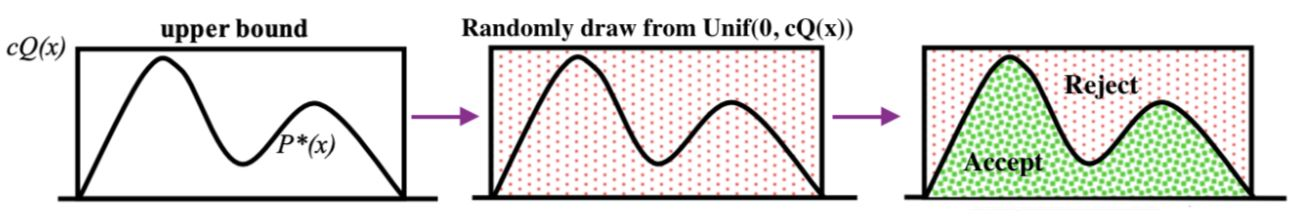

Supongamos que la distribución objetivo que queremos probar es una mezcla de Gaussianas: $P(x) = \mathcal{N}(30, 10)$ + $\mathcal{N}(80, 20)$. 

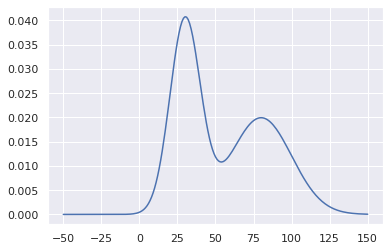

In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()

def P(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20) #Distribución objetivo

x = np.arange(-50, 151)

plt.plot(x, P(x))
plt.show()

Ahora debemos proponer una distribución fácil de muestrear, y para este caso elegiremos $Q(x) = \mathcal{N}(50, 30)$.

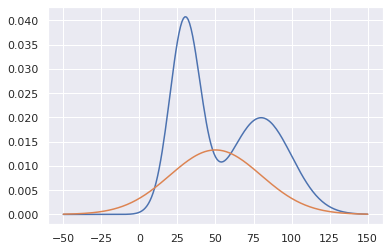

In [2]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def P(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20) #Distribución objetivo

def Q(x):
    return st.norm.pdf(x, loc=50, scale=30) #Distribución propuesta

x = np.arange(-50, 151)

plt.plot(x, P(x))
plt.plot(x, Q(x))
plt.show()

Si aplicamos rejection sampling con este $Q(x)$, seguramente fallará, ya que el área bajo la curva de $P(x)$ no está cubierta completamente por $Q(x)$. Intuitivamente, la tasa de aceptación será más baja. Para remediarlo, necesitamos encontrar el factor de escala k, de modo que $kQ(x)$ envuelva a $P(x)$ por completo. Para encontrarlo, necesitamos obtener la razón máxima de $P(x)$ y $Q(x)$. Entonces será $k = max\left(\dfrac{P(x)}{Q(x)}\right)$ para todo $x$.

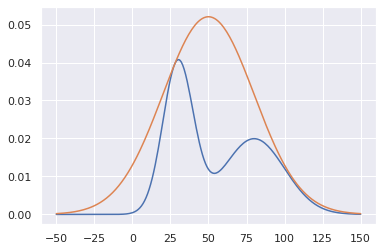

In [3]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()


def P(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20) #Distribución objetivo


def Q(x):
    return st.norm.pdf(x, loc=50, scale=30) #Distribución propuesta


x = np.arange(-50, 151)
k = max(P(x) / Q(x)) #Factor de escala

plt.plot(x, P(x))
plt.plot(x, k*Q(x))
plt.show()

Este método consiste en:
* Producir muchas muestras a partir de la distribución propuesta $Q(x)$, $z ∼ Q(x)$, 
* Luego elegimos uniformemente la altura de la distribución, de modo que sea $u ∼ Uniform (0, kQ(z))$. 
* Evaluamos la altura de nuestra distribución objetivo $P(x)$ en el punto $z$; es decir, $P(z)$. Y luego, muy intuitivamente, aceptamos los valores de $u$ que estén debajo de la curva $P(z)$.

Dado un tiempo prolongado para ejecutar y generar muestras, entonces convergerá a $P(x)$. 

Aceptadas -  0.5082


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


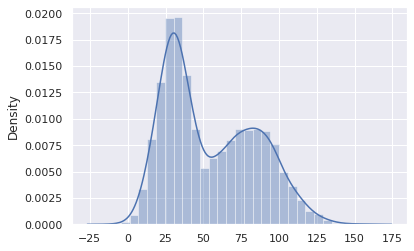

In [4]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def P(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20) #Distribución objetivo

def Q(x):
    return st.norm.pdf(x, loc=50, scale=30) #Distribución propuesta
    
x = np.arange(-50, 151)
k = max(P(x) / Q(x)) #Factor de escala


def rejection_sampling(iter):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*Q(z))

        if u <= P(z):
            samples.append(z) #Valores aceptados

    print('Aceptadas - ', len(samples)/iter)        

    return np.array(samples)

s = rejection_sampling(iter=10000)
sns.distplot(s)

In [5]:
s.mean()

54.78920506999543

Aunque el muestreo de rechazo es simple. El inconveniente es que debemos hacer una buena elección de la distribución propuesta $Q(x)$ para que envuelva la distribución objetivo. Además, el factor de escala juega un papel importante en en la tasa de rechazo, la cual será proporcional a la relación entre $P(x)$ y $Q(x)$. Tener una $Q(x)$ realmente grande seguramente envolverá la $P(x)$, pero también significa que hay mucho espacio desperdiciado que el algoritmo rechazará, lo que significa una pérdida de tiempo computacional.

###**Ejemplo 2:**  
Deseamos muestrear la función $f(x) = 1.2 -x^4$ con $0\le x \le 1$. Para ello, 

* Graficamos nuestra función objetivo.
* Proponemos una distribución que envuelva nuestra función objetivo.
* Eligimos números aleatorios. $z \sim Q(x)$, y $u \sim Unif(0, kQ(x))$
* Si el valor de $u$ que elegimos aleatoriamente es menor que $P(z)$ se conserva; de lo contrario, se rechaza.

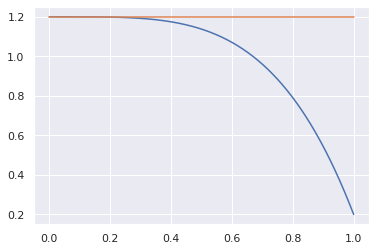

In [6]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def P(x):
    return 1.2 - x**4 #Distribución objetivo

def Q(x):
    return st.uniform.pdf(x, loc=0, scale=1) #Distribución propuesta

x = np.linspace(0, 1, 1000)
k = max(P(x) / Q(x)) #Factor de escala

plt.plot(x, P(x))
plt.plot(x, k*Q(x))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


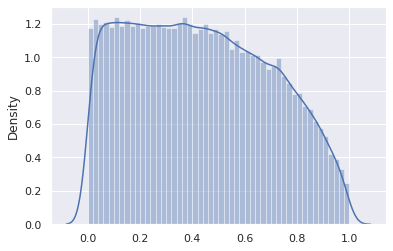

In [7]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def P(x):
    return 1.2 - x**4 #Distribución objetivo

def Q(x):
    return st.uniform.pdf(x, loc=0, scale=1) #Distribución propuesta

x = np.linspace(0, 1, 1000)
k = max(P(x) / Q(x)) #Factor de escala

def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.uniform(0, 1)
        u = np.random.uniform(0, k*Q(z))

        if u <= P(z):
            samples.append(z)
            
    return np.array(samples)

s = rejection_sampling(iter=100000)
sns.distplot(s)

###**Ejemplo 3:**
Si queremos muestrear una distribución gaussiana como esta:

$$f(x) = e^{-\pi x^2},\,\,\,\,\, -10 \le x\le 10$$

¿Qué pasa con este método de muestreo si queremos obtener un valor atípicos en los extremos?

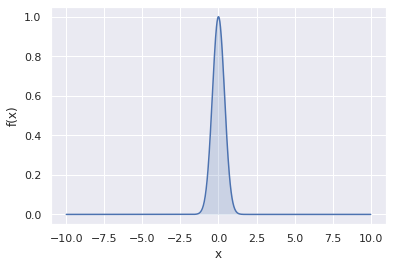

In [8]:
def P(x):
    return np.exp(-np.pi * x**2) #Función objetivo

xs = np.linspace(-10, 10, 1000)
ys = P(xs)

plt.plot(xs, ys)
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.xlabel("x"), plt.ylabel("f(x)");

Hay una gran cantidad de espacio en blanco en los extremos!

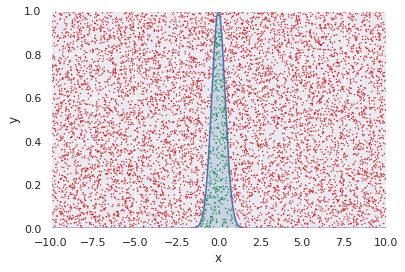

In [9]:
def rejectSampling(function, num_samples, xmin=-10, xmax=10, ymax=1.2):
    z = np.random.uniform(low=xmin, high=xmax, size=num_samples)
    u = np.random.uniform(low=0, high=ymax, size=num_samples)
    passed = (u < function(z)).astype(int)
    return z, u, passed

z, u, passed = rejectSampling(P, 10000)

plt.plot(xs, ys)
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.scatter(z, u, c=passed, cmap="RdYlGn", vmin=-0.1, vmax=1.1, lw=0, s=2)
plt.xlabel("x"), plt.ylabel("y"), plt.xlim(-10, 10), plt.ylim(0, 1);


In [10]:
print(f"Efficiency is only {passed.mean() * 100:0.1f}%")

Efficiency is only 4.2%


###**Ejemplo 4:**
Qué obtenemos al graficar la siguiente función:

$$f(x,a) = \dfrac{1}{2Γ(a)}|x|^{a-1}exp(-|x|)$$

con $a=1$. Usar `stats.dgamma(a=1)` como la función objetivo y 
`stats.norm(loc=0, scale=2)` como la función propuesta.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


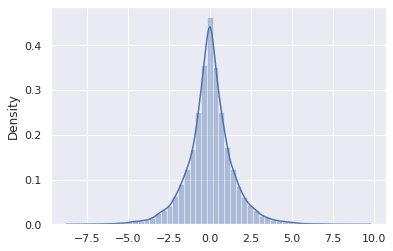

In [11]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

def P(x):
    return st.dgamma.pdf(x, 1) #Distribución objetivo

def Q(x):
    return st.norm.pdf(x, loc=0, scale=2) #Distribución propuesta

x = np.linspace(-6, 6, 1000)
k = max(P(x) / Q(x)) #Factor de escala

def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(0, 2)
        u = np.random.uniform(0, k*Q(z))

        if u <= P(z):
            samples.append(z)
            
    return np.array(samples)

s = rejection_sampling(iter=100000)
sns.distplot(s)

In [41]:
s.mean()

0.01023729749091498

#**Integración Monte Carlo**
Este método utiliza números aleatorios para estimar el valor de una integral definida. Considere una función integrable en el intervalo $(a,b)$ y suponga que desea evaluar $\int_{a}^{b}f(x)dx$.

Esta integral puede expresarse en términos de la esperanza de cierta variable aleatoria; es decir, 

$$\int_{a}^{b}f(x)dx = (b-a)\operatorname{E}[f(X)]$$

siendo $\operatorname{E}[f(X)]≈ \dfrac{1}{N}\sum_{i=1}^Nf(X_i)$ y $f(X)$ es la variable aleatoria con $X \sim \operatorname {U} (a,b)$.

Por lo que para calcular la integral hay que calcular el valor esperado de $f(X)$. Así, la integral puede ser expresada de la siguiente manera:

$$\int_{a}^{b}f(x)dx ≈ \dfrac{b-a}{N}\sum_{i=1}^Nf(x_i)$$

MIentras más grande sea N, más exacta será la aproximación.


El algoritmo para evaluar la una integral de la forma $\int _{a}^{b}f(x)dx$ es sencillo, el cual debe seguir el siguiente procedimmiento

* Generar una muestra aleatoria de tamaño $N$ de $X \sim \operatorname (a,b)$.
* Evaluar cada elemento de la muestra en la función $f$.
* Calcular $\dfrac{b-a}{N}\sum_{i=1}^N f(x_i)$

(ver Rubin H. Landau página 105 o https://es.wikipedia.org/wiki/Integraci%C3%B3n_de_Monte_Carlo)

###**Ejemplo 1:**
Vamos a resolver $\int_0^{\pi}Sin(x) dx$

In [19]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

#Límites de integración 
a= 0
b = np.pi

N = 100
xrand = np.zeros(N)

for i in range(len(xrand)):
  xrand[i] = random.uniform(a,b)

def func(x):
  return np.sin(x) #Función a integrar

integral = 0.0

for i in range(N):
  integral += func(xrand[i])

Respuesta = (b-a)/float(N)*integral
print('La integral desde 0 hasta \pi de Sin(x) es',Respuesta)

La integral desde 0 hasta \pi de Sin(x) es 2.0508300911361297


Text(0.5, 0, 'Areas')

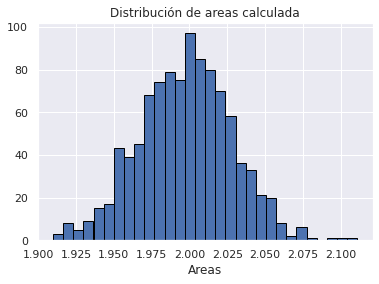

In [12]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

#Límites de integración 
a= 0
b = np.pi

areas = []

for i in range(N):
  xrand = np.zeros(N)

  for i in range(len(xrand)):
    xrand[i] = random.uniform(a,b)
    integral = 0.0

  for i in range(N):
    integral += func(xrand[i])

  Respuesta = (b-a)/float(N)*integral
  areas.append(Respuesta)

plt.title('Distribución de areas calculada')  
plt.hist(areas, bins = 30, ec = 'black')
plt.xlabel("Areas")

Resuelva 
* $\int_0^{1}x^2 dx$

* $\int_{1}^{2}\dfrac{1}{1+sinh(2x)log^2(x)}dx$


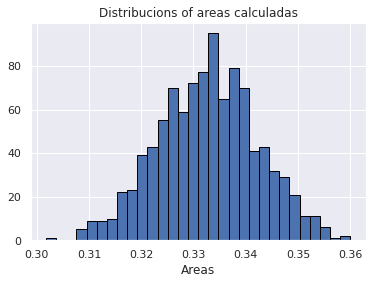

In [13]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt
 
# limites de integración
a = 0
b = 1
N = 1000
 
def f(x):
    return x**2 #Función objetivo
 
plt_vals = []
 
for i in range(N):
   
    ar = np.zeros(N)
 
    for i in range (len(ar)):
        ar[i] = random.uniform(a,b)
 
    integral = 0.0
 
    for i in ar:
        integral += f(i)
 
    # MonteCarlo integration
    ans = (b-a)/float(N)*integral
 
    plt_vals.append(ans)
 
plt.title("Distribucions of areas calculadas")
 
plt.hist (plt_vals, bins=30, ec="black")
plt.xlabel("Areas")
plt.show() 

[1] Landau, R. H., Páez, M. J. (2018). Computational problems for physics. With Guided Solutions Using Python. CRC Press

[2] Krauth, W. (2006). Statistical mechanics: algorithms and computations (Vol. 13). OUP Oxford.


